In [3]:
import cv2
import cvzone
from cvzone.FaceMeshModule import FaceMeshDetector
from cvzone.PlotModule import LivePlot

In [6]:
cap = cv2.VideoCapture("sd1.mp4")
detector = FaceMeshDetector()
plotY = LivePlot(540, 360, [10, 60])

idList = [22, 23, 24, 26, 110, 157, 158, 159, 160, 161, 130, 243]
color = (0, 0, 255)
ratioList = []
counter = 0
blickCounter = 0

while True:
    success, img = cap.read()
    if not success:
        break
    img, faces = detector.findFaceMesh(img, draw = False)
    
    if faces:
        face = faces[0]
        
        for id in idList:
            cv2.circle(img, face[id], 5, color, cv2.FILLED)
        
        leftUp = face[159]
        leftDown = face[23]
        leftLeft = face[130]
        leftRight = face[243]
        
        lengthVer, _ = detector.findDistance(leftUp, leftDown)
        lengthHor, _ = detector.findDistance(leftLeft, leftRight)
        
        cv2.line(img, leftUp, leftDown, (0,255,0),3)
        cv2.line(img, leftLeft, leftRight, (0,255,0),3)
        
        ratio = int((lengthVer/lengthHor)*100)
        ratioList.append(ratio)
        if len(ratioList)>3:
            ratioList.pop(0)       
        
        ratioAvg = sum(ratioList)/len(ratioList)
        
        if ratioAvg < 35 and counter == 0:
            blickCounter += 1
            color = (0,255,0)
            counter = 1
        if counter != 0:
            counter += 1
            if counter > 10:
                counter = 0
                color = (0,0,255)
        
        cvzone.putTextRect(img, f'Blink Count: {blickCounter}', (50,100), colorR = color)
    
        imgPlot = plotY.update(ratioAvg, color)
        img = cv2.resize(img, (640,360))
        imgStack = cvzone.stackImages([img, imgPlot], 2,1)
        
    cv2.imshow("img", imgStack)
    key = cv2.waitKey(25) & 0xFF
    
    if key == ord("q"):
        break

cv2.destroyAllWindows()

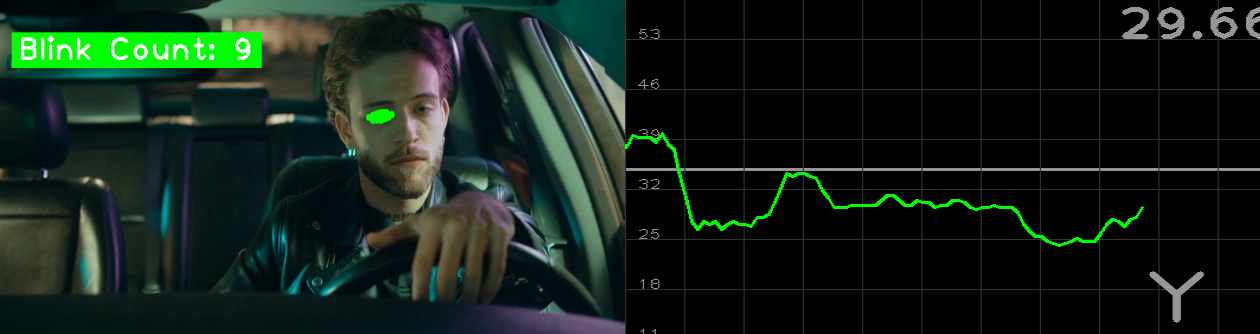

In [7]:
cap = cv2.VideoCapture("sd2.mp4")
detector = FaceMeshDetector()
plotY = LivePlot(540, 360, [10, 60])

idList = [22, 23, 24, 26, 110, 157, 158, 159, 160, 161, 130, 243]
color = (0, 0, 255)
ratioList = []
counter = 0
blickCounter = 0

while True:
    success, img = cap.read()
    if not success:
        break
    img, faces = detector.findFaceMesh(img, draw = False)
    
    if faces:
        face = faces[0]
        
        for id in idList:
            cv2.circle(img, face[id], 5, color, cv2.FILLED)
        
        leftUp = face[159]
        leftDown = face[23]
        leftLeft = face[130]
        leftRight = face[243]
        
        lengthVer, _ = detector.findDistance(leftUp, leftDown)
        lengthHor, _ = detector.findDistance(leftLeft, leftRight)
        
        cv2.line(img, leftUp, leftDown, (0,255,0),3)
        cv2.line(img, leftLeft, leftRight, (0,255,0),3)
        
        ratio = int((lengthVer/lengthHor)*100)
        ratioList.append(ratio)
        if len(ratioList)>3:
            ratioList.pop(0)       
        
        ratioAvg = sum(ratioList)/len(ratioList)
        
        if ratioAvg < 35 and counter == 0:
            blickCounter += 1
            color = (0,255,0)
            counter = 1
        if counter != 0:
            counter += 1
            if counter > 10:
                counter = 0
                color = (0,0,255)
        
        cvzone.putTextRect(img, f'Blink Count: {blickCounter}', (50,100), colorR = color)
    
        imgPlot = plotY.update(ratioAvg, color)
        img = cv2.resize(img, (640,360))
        imgStack = cvzone.stackImages([img, imgPlot], 2,1)
        
    cv2.imshow("img", imgStack)
    key = cv2.waitKey(25) & 0xFF
    
    if key == ord("q"):
        break

cv2.destroyAllWindows()

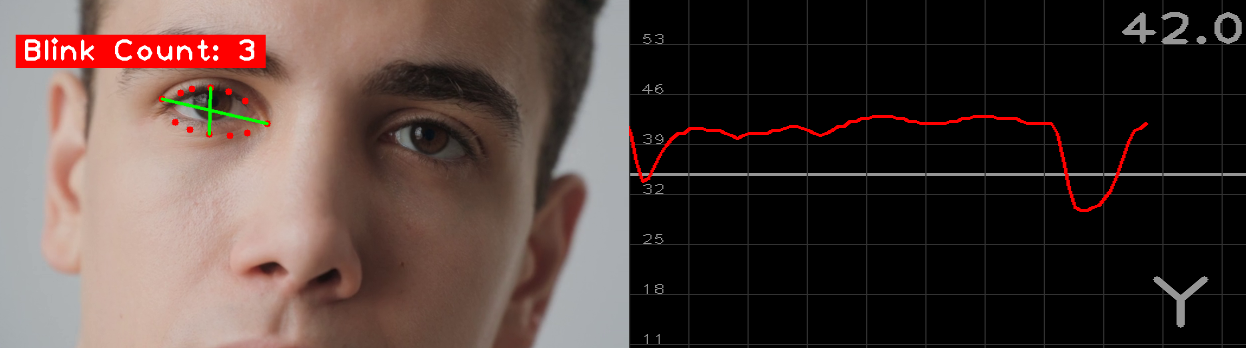

Sources

https://www.udemy.com/course/python-opencv-ile-sfrdan-uzmanlga-goruntu-isleme-gi-1/
    
https://github.com/google/mediapipe/blob/master/docs/solutions/hands.md